In [1]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [2]:
import os

pwd = os.getcwd()

# loading the dataset
df = pd.read_csv(pwd + '\merged_data.csv')
df.head(10)

,Date,Open,Close,Change,sentiment,sentiment_score
0,2025-01-10,3761.549,3736.886,-0.66,0,0.700804
1,2024-12-19,3780.106,3708.531,-1.93,0,0.950467
2,2024-12-18,3774.744,3781.551,0.18,1,0.460880
3,2024-12-16,3748.220,3765.163,0.45,1,0.771217
4,2024-12-12,3744.519,3748.267,0.10,1,0.927686
5,2024-12-11,3749.319,3744.451,-0.13,1,0.844994
6,2024-12-10,3735.431,3749.303,0.37,0,0.695004
7,2024-12-06,3782.755,3752.733,-0.80,-1,0.504000
8,2024-12-05,3785.848,3782.822,-0.08,0,0.641164
9,2024-12-03,3780.565,3788.521,0.21,1,0.945470


In [3]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,Close,Change,sentiment,sentiment_score
0,2025-01-10,3761.549,3736.886,-0.66,0,0.700804
1,2024-12-19,3780.106,3708.531,-1.93,0,0.950467
2,2024-12-18,3774.744,3781.551,0.18,1,0.460880
3,2024-12-16,3748.220,3765.163,0.45,1,0.771217
4,2024-12-12,3744.519,3748.267,0.10,1,0.927686
5,2024-12-11,3749.319,3744.451,-0.13,1,0.844994
6,2024-12-10,3735.431,3749.303,0.37,0,0.695004
7,2024-12-06,3782.755,3752.733,-0.80,-1,0.504000
8,2024-12-05,3785.848,3782.822,-0.08,0,0.641164
9,2024-12-03,3780.565,3788.521,0.21,1,0.945470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             430 non-null    object 
 1   Open             430 non-null    float64
 2   Close            430 non-null    float64
 3   Change           430 non-null    float64
 4   sentiment        430 non-null    int64  
 5   sentiment_score  430 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 20.3+ KB


In [5]:
df.columns

Index(['Date', 'Open', 'Close', 'Change', 'sentiment', 'sentiment_score'], dtype='object')

In [6]:
df.drop(['Open', 'Change', 'sentiment', 'sentiment_score'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    430 non-null    object 
 1   Close   430 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg = df.set_index(['Date'], drop=True)
df_chg.head()

,Close
Date,
2025-01-10,3736.886
2024-12-19,3708.531
2024-12-18,3781.551
2024-12-16,3765.163
2024-12-12,3748.267


<Axes: xlabel='Date'>

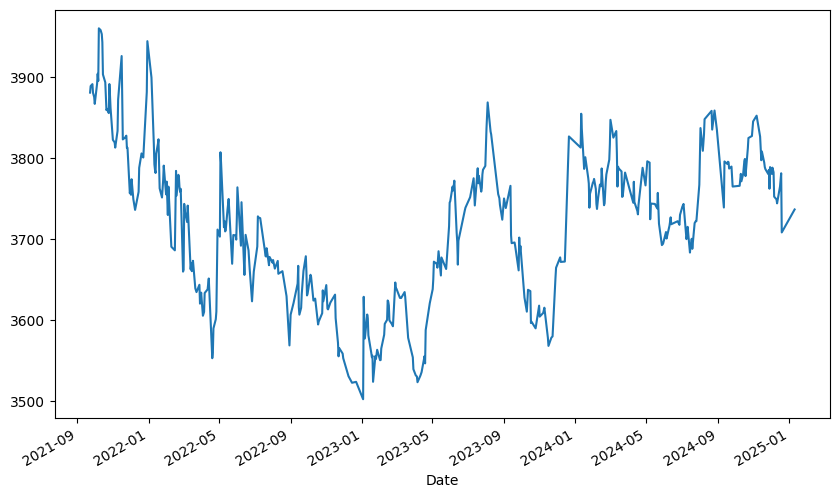

In [8]:
plt.figure(figsize=(10, 6))
df_chg['Close'].plot()

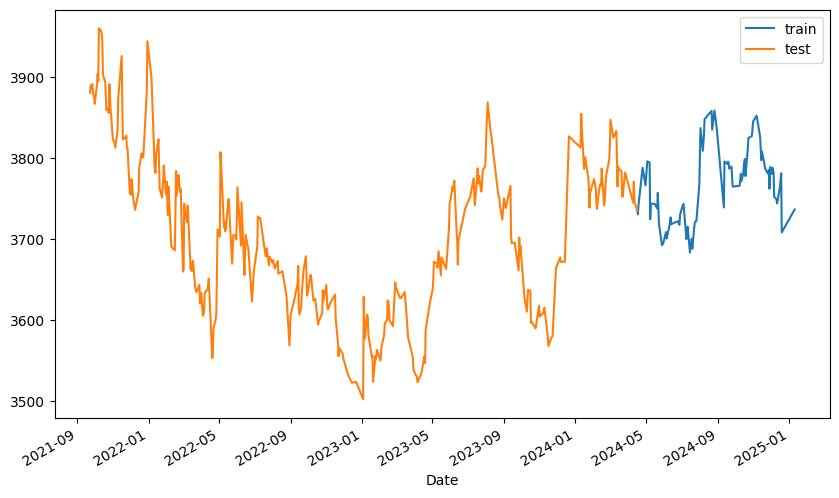

In [9]:
# splitting the dataset into training and testing sets
split_date = df_chg.index[int(len(df_chg) * 0.2)]
df1 = df_chg['Close']

train = df1.loc[:split_date]
test = df1.loc[split_date:]

plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [10]:
print('There are', len(train), 'values in the training set.')
print('There are', len(test), 'values in the test set.')

There are 87 values in the training set.
There are 344 values in the test set.


In [11]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:345:1]

test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[344:430:1]

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))

train_scaled = scaler.fit_transform(train_processed)
test_scaled = scaler.transform(test_processed)

In [13]:
X_train = train_scaled[:-1]
y_train = train_scaled[1:]

In [14]:
X_test = test_scaled[:-1]

y_test = test_scaled[1:]



We create a Sequantial model

add layers via the .add() method

Pass an input_dim argument to the first layer.

The activation function is the Rectified Linear Unit- Relu.

Configure the learning process, which is done via the compile method.

A loss function is mean_squared_error , and An optimizer is adam.

Stop training when a monitored loss has stopped improving.

patience=2, indicate number of epochs with no improvement after which training will be stopped.

The ANN is trained for 100 epochs and a batch size of 1 is used.



In [15]:
# ann model
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 0.1575
Epoch 2/100
344/344 [==============================] - 0s 979us/step - loss: 0.0469
Epoch 3/100
344/344 [==============================] - 0s 959us/step - loss: 0.0295
Epoch 4/100
344/344 [==============================] - 0s 949us/step - loss: 0.0267
Epoch 5/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 6/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 7/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 8/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 9/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 10/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 11/100
344/344 [==============================] - 0s 992us/step - loss: 0.0246
Epoch 12/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch

In [16]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

11/11 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.884
The R2 score on the Test set is:	0.636


In [18]:
train_sc_df = pd.DataFrame(train_scaled, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_scaled, columns=['Y'], index=test.index)

for s in range(1, 2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

ValueError: Shape of passed values is (345, 1), indices imply (87, 1)

LSTM has a visible layer with 1 input.

A hidden layer with LSTM neurons.

We used relu activation function for the LSTM neurons.

A loss function is mean_squared_error , and An optimizer is adam.

Stop training when a monitored loss has stopped improving.

The LSTM is trained for 100 epoch and a batch size of 1 is used.


In [19]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (344, 1, 1)
Test shape:  (85, 1, 1)


In [20]:
# lstm model
lstm_model = Sequential()

lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), 
                    activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 0.2475
Epoch 2/100
344/344 [==============================] - 0s 1ms/step - loss: 0.2044
Epoch 3/100
344/344 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 4/100
344/344 [==============================] - 0s 1ms/step - loss: 0.1045
Epoch 5/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 6/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 7/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 8/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 9/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0271
Epoch 10/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 11/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 12/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 13/100


In [21]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

11/11 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.889
The R2 score on the Test set is:	0.758


In [22]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

85/85 [==============================] - 0s 912us/step - loss: 0.0448
NN: 0.067383
LSTM: 0.044796


In [23]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

3/3 [==============================] - 0s 2ms/step


In [24]:
y_pred_test_nn = nn_model.predict(X_test)


3/3 [==============================] - 0s 2ms/step


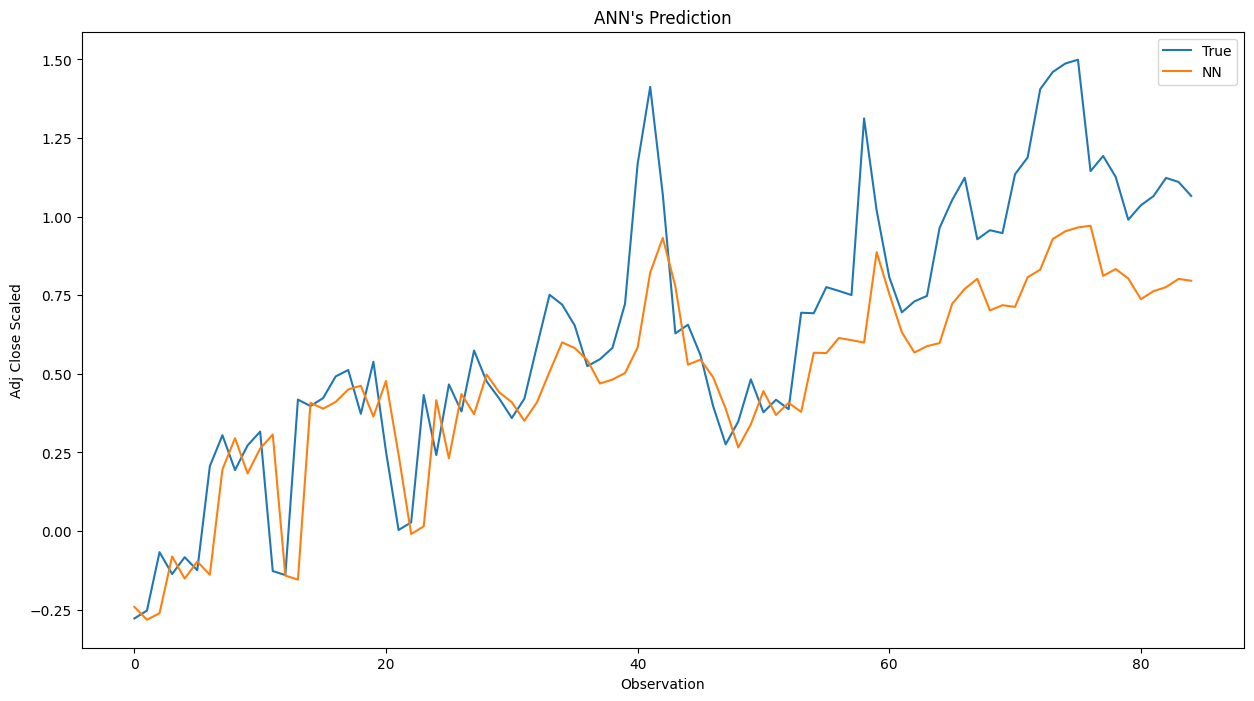

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

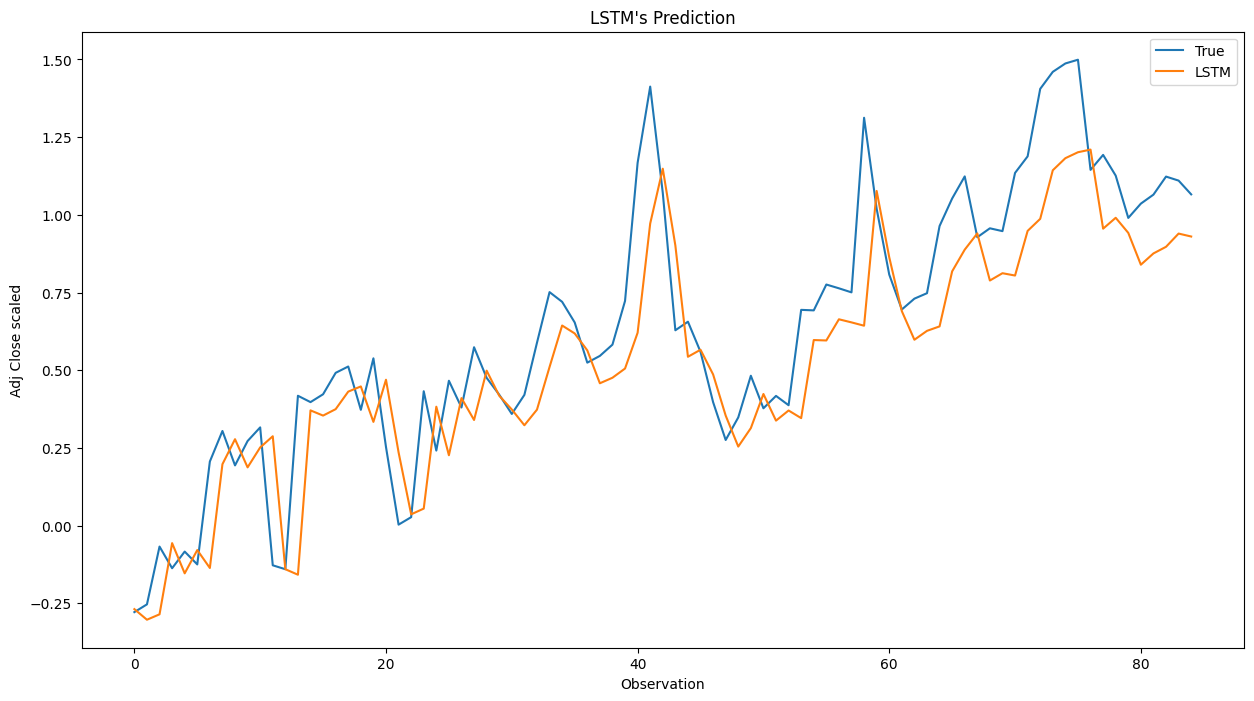

In [26]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for the LSTM model
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_test_lstm))
print("RMSE for LSTM model: {:.3f}".format(rmse_lstm))

# Calculate RMSE for the ANN model
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_test_nn))
print("RMSE for ANN model: {:.3f}".format(rmse_nn))

# Calculate MAE for the LSTM model
mae_lstm = np.mean(np.abs(y_test - y_pred_test_lstm))
print("MAE for LSTM model: {:.3f}".format(mae_lstm))

# Calculate MAE for the ANN model
mae_nn = np.mean(np.abs(y_test - y_pred_test_nn))
print("MAE for ANN model: {:.3f}".format(mae_nn))

# Calculate MSE for the LSTM model
mse_lstm = mean_squared_error(y_test, y_pred_test_lstm)
print("MSE for LSTM model: {:.3f}".format(mse_lstm))

# Calculate MSE for the ANN model
mse_nn = mean_squared_error(y_test, y_pred_test_nn)
print("MSE for ANN model: {:.3f}".format(mse_nn))

RMSE for LSTM model: 0.212
RMSE for ANN model: 0.260
MAE for LSTM model: 0.161
MAE for ANN model: 0.199
MSE for LSTM model: 0.045
MSE for ANN model: 0.067
